In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("stroke-data.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
df.shape

(5110, 12)

In [4]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [5]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [7]:
df.corr(numeric_only=True)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


<Axes: >

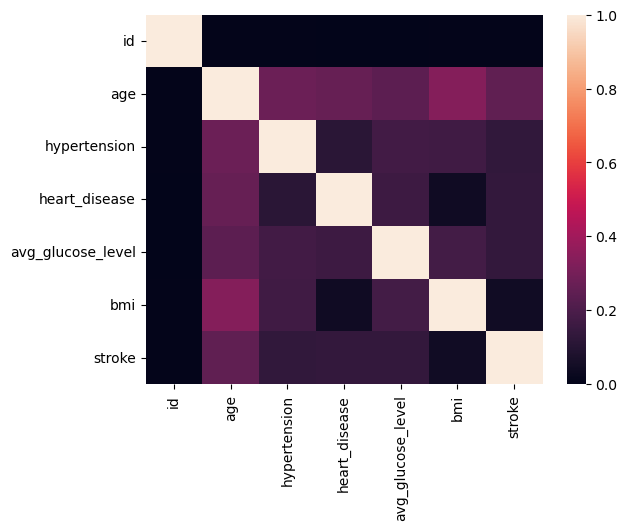

In [8]:
sns.heatmap(df.corr(numeric_only=True))

In [9]:
from scipy.stats import chi2_contingency
for col in ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']:
    table = pd.crosstab(df[col], df['stroke'])
    _, p, _, _ = chi2_contingency(table)
    print(f"{col}: p-value = {p:.4f} → {'Significant' if p < 0.05 else 'Not Significant'}")

gender: p-value = 0.7895 → Not Significant
ever_married: p-value = 0.0000 → Significant
work_type: p-value = 0.0000 → Significant
Residence_type: p-value = 0.2983 → Not Significant
smoking_status: p-value = 0.0000 → Significant


In [10]:
df.drop(['id','bmi','gender','Residence_type'],axis=1,inplace=True)

In [11]:
df.dtypes

age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
avg_glucose_level    float64
smoking_status        object
stroke                 int64
dtype: object

In [12]:
df.isna().sum()

age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
avg_glucose_level    0
smoking_status       0
stroke               0
dtype: int64

<Axes: xlabel='stroke', ylabel='count'>

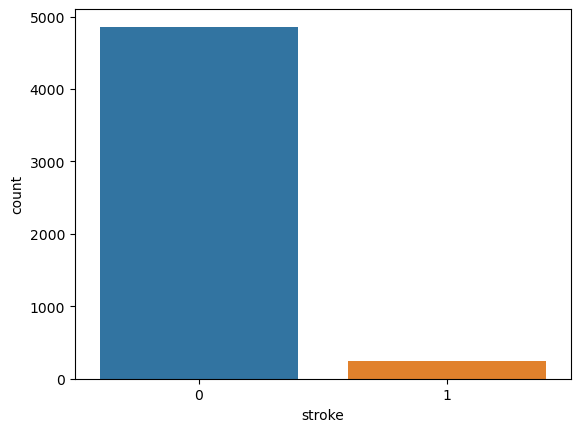

In [13]:
# check the dataset set is balanced/imbalanced
sns.countplot(x='stroke',data=df)

In [14]:
# the given dataset is an imbalanced one so we have to balance it

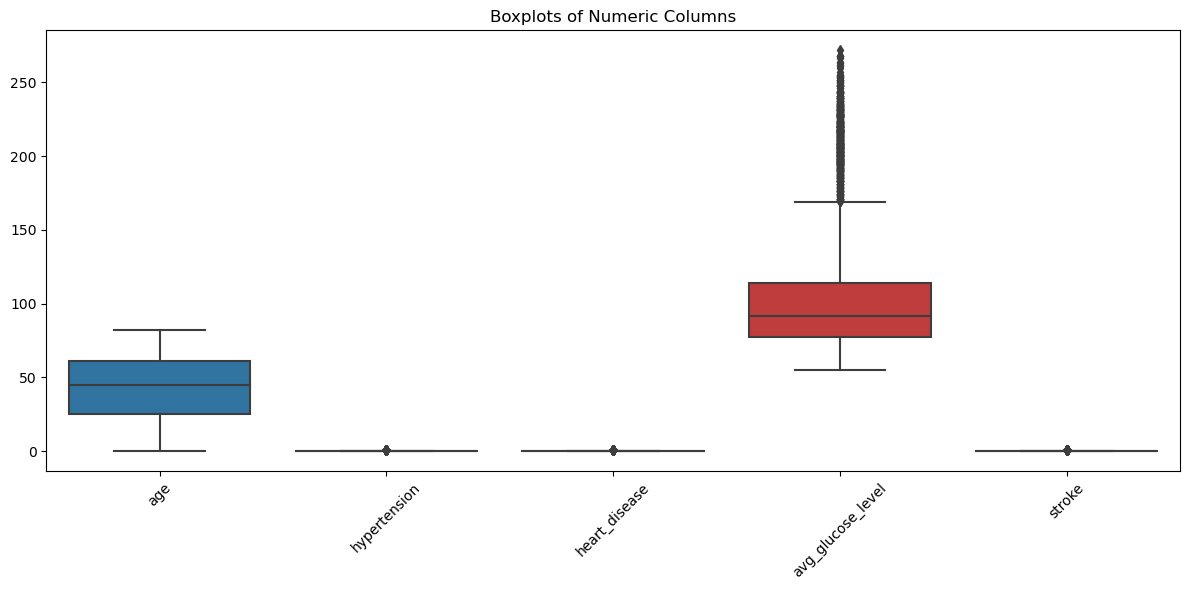

In [15]:
#checking outliers

plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=['number']))
plt.xticks(rotation=45)
plt.title('Boxplots of Numeric Columns')
plt.tight_layout()
plt.show()

In [16]:
outliers_dict = {}

for col in df.select_dtypes(include=['number']).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    outliers_dict[col] = outliers.shape[0]  # or list of indices: outliers.index.tolist()

# Print count of outliers per column
for col, count in outliers_dict.items():
    print(f"{col}: {count} outliers")

age: 0 outliers
hypertension: 498 outliers
heart_disease: 276 outliers
avg_glucose_level: 627 outliers
stroke: 249 outliers


In [ ]:
# removing outliers

for col in df.select_dtypes(include='number').columns:
    if col == 'stroke':
        continue  # skip the target column
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

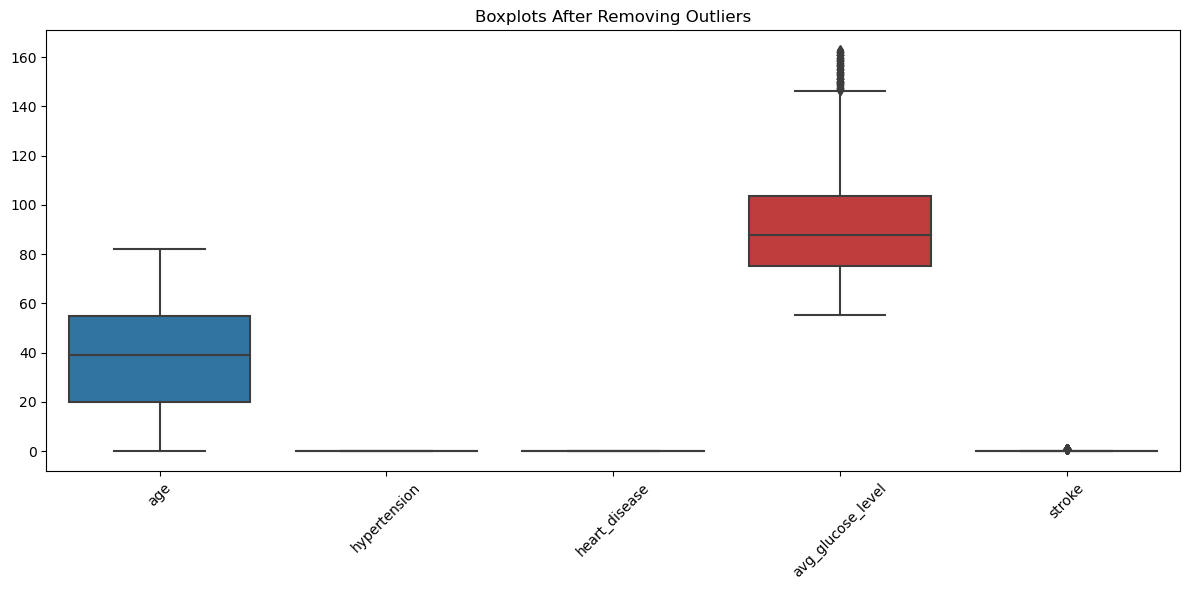

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=['number']))
plt.xticks(rotation=45)
plt.title('Boxplots After Removing Outliers')
plt.tight_layout()
plt.show()


In [19]:
dfe=pd.get_dummies(df[['ever_married','work_type','smoking_status']],drop_first=True,dtype=int)
dfe

,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
7,0,0,1,0,0,0,1,0
8,1,0,1,0,0,0,0,0
9,1,0,1,0,0,0,0,0
12,1,0,1,0,0,0,0,1
18,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...
5103,0,0,1,0,0,0,0,0
5104,0,0,0,0,1,0,0,0
5106,1,0,0,1,0,0,1,0
5107,1,0,0,1,0,0,1,0


In [20]:
df = df.reset_index(drop=True)
dfe = dfe.reset_index(drop=True)

In [21]:
df_1 = pd.concat([df, dfe], axis=1)
df_1

,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,smoking_status,stroke,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,69.0,0,0,No,Private,94.39,never smoked,1,0,0,1,0,0,0,1,0
1,59.0,0,0,Yes,Private,76.15,Unknown,1,1,0,1,0,0,0,0,0
2,78.0,0,0,Yes,Private,58.57,Unknown,1,1,0,1,0,0,0,0,0
3,54.0,0,0,Yes,Private,104.51,smokes,1,1,0,1,0,0,0,0,1
4,60.0,0,0,No,Private,89.22,never smoked,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3980,18.0,0,0,No,Private,82.85,Unknown,0,0,0,1,0,0,0,0,0
3981,13.0,0,0,No,children,103.08,Unknown,0,0,0,0,0,1,0,0,0
3982,81.0,0,0,Yes,Self-employed,125.20,never smoked,0,1,0,0,1,0,0,1,0
3983,35.0,0,0,Yes,Self-employed,82.99,never smoked,0,1,0,0,1,0,0,1,0


In [22]:
df_1.drop(['ever_married','work_type','smoking_status'],axis=1,inplace=True)
df_1

,age,hypertension,heart_disease,avg_glucose_level,stroke,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,69.0,0,0,94.39,1,0,0,1,0,0,0,1,0
1,59.0,0,0,76.15,1,1,0,1,0,0,0,0,0
2,78.0,0,0,58.57,1,1,0,1,0,0,0,0,0
3,54.0,0,0,104.51,1,1,0,1,0,0,0,0,1
4,60.0,0,0,89.22,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3980,18.0,0,0,82.85,0,0,0,1,0,0,0,0,0
3981,13.0,0,0,103.08,0,0,0,0,0,1,0,0,0
3982,81.0,0,0,125.20,0,1,0,0,1,0,0,1,0
3983,35.0,0,0,82.99,0,1,0,0,1,0,0,1,0


In [23]:
x=df_1.drop(['stroke'],axis=1).values
x

array([[69.,  0.,  0., ...,  0.,  1.,  0.],
       [59.,  0.,  0., ...,  0.,  0.,  0.],
       [78.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [81.,  0.,  0., ...,  0.,  1.,  0.],
       [35.,  0.,  0., ...,  0.,  1.,  0.],
       [44.,  0.,  0., ...,  0.,  0.,  0.]])

In [24]:
y=df['stroke'].values
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [25]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_resampled,y_resampled,test_size=0.30,random_state=42)
x_train

array([[27.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [57.60535842,  0.        ,  0.        , ...,  0.30267921,
         0.        ,  0.        ],
       [76.72801226,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [32.        ,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [63.72735482,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [55.85146533,  0.        ,  0.        , ...,  0.        ,
         0.62970693,  0.        ]])

In [27]:
x_test

array([[2.80000000e+01, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.87793652e+01, 0.00000000e+00, 0.00000000e+00, ...,
        7.79365170e-01, 2.20634830e-01, 0.00000000e+00],
       [5.77563923e+01, 0.00000000e+00, 0.00000000e+00, ...,
        9.39098067e-01, 0.00000000e+00, 6.09019331e-02],
       ...,
       [6.25477881e+01, 0.00000000e+00, 0.00000000e+00, ...,
        1.13052968e-01, 0.00000000e+00, 0.00000000e+00],
       [5.30000000e+01, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [7.90882608e+01, 0.00000000e+00, 0.00000000e+00, ...,
        6.37246400e-01, 3.62753600e-01, 0.00000000e+00]])

In [28]:
y_train

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

In [29]:
y_test

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [30]:
# normalizing the dataset

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,ConfusionMatrixDisplay
knn=KNeighborsClassifier(n_neighbors=7)
naive=BernoulliNB()
support=SVC()
tree=DecisionTreeClassifier()
forest=RandomForestClassifier()
lst=[knn,naive,support,tree,forest]

In [32]:
for i in lst:
    i.fit(x_train,y_train)
    y_predict=i.predict(x_test)
    print("performance evaluation of :- ",i)
    print("confusion_matrix is :-",confusion_matrix(y_test,y_predict))
    print("*"*100)
    print("accuracy score is :-",accuracy_score(y_test,y_predict))
    print("*"*100)
    print("classifiaction report is :-",classification_report(y_test,y_predict))
    print("*"*100)

performance evaluation of :-  KNeighborsClassifier(n_neighbors=7)
confusion_matrix is :- [[1060  107]
 [  24 1134]]
****************************************************************************************************
accuracy score is :- 0.9436559139784946
****************************************************************************************************
classifiaction report is :-               precision    recall  f1-score   support

           0       0.98      0.91      0.94      1167
           1       0.91      0.98      0.95      1158

    accuracy                           0.94      2325
   macro avg       0.95      0.94      0.94      2325
weighted avg       0.95      0.94      0.94      2325

****************************************************************************************************
performance evaluation of :-  BernoulliNB()
confusion_matrix is :- [[825 342]
 [219 939]]
************************************************************************************************